In [5]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1d Gaussian

In [116]:
mu = 1
sigma = .3
n=100
samples = mu + sigma*np.random.randn(n)

def likelihood(samples, mu=mu, sigma=sigma):
    return np.exp( - (samples-mu)**2 / sigma**2 / 2) / np.sqrt(2*np.pi) / sigma

In [232]:
class Gauss1D(nn.Module):
    
    def __init__(self, mu=0, z=0):
        super().__init__()
        #parametrize the precision as exponential z
        self.mu= nn.Parameter(torch.tensor(mu, dtype=torch.float))
        self.z = nn.Parameter(torch.tensor(z, dtype=torch.float)) # torch.tensor(2.) #
        
    def forward(self, samples):
        # negative log likelihood of samples
        return .5 *((samples - self.mu)**2 * torch.exp(self.z) - self.z)
    
    def likelihood(self, npsamples):
        return np.exp(-model(torch.from_numpy(npsamples)).detach().numpy())/  np.sqrt(2*np.pi)

In [233]:
model = Gauss1D()
model(torch.from_numpy(samples))

tensor([0.2172, 0.5410, 0.9357, 0.2817, 0.3900, 1.1376, 1.0310, 0.2134, 0.7192,
        0.6826, 0.8871, 0.9294, 0.2746, 0.7726, 0.1243, 0.8152, 0.3873, 0.9576,
        0.4885, 0.5470, 0.7501, 0.3479, 0.3086, 0.6285, 0.2581, 0.9002, 0.8453,
        1.0744, 0.4928, 0.6660, 0.4329, 0.5045, 0.5177, 0.3282, 0.2183, 0.5721,
        0.7202, 1.2225, 0.6777, 0.2017, 0.1685, 0.7639, 0.3646, 0.9148, 0.2527,
        0.1501, 0.1721, 0.0345, 0.2296, 0.7391, 0.2684, 0.3127, 0.6538, 0.6543,
        0.9602, 0.1626, 0.2560, 0.2389, 0.3041, 0.3656, 0.2677, 0.1575, 0.5032,
        0.3398, 0.7436, 1.0285, 0.9713, 0.3242, 0.1860, 0.7724, 0.1271, 0.3227,
        0.2047, 0.0706, 0.6183, 0.8780, 0.5998, 0.1031, 0.3692, 0.4119, 0.5941,
        1.1895, 0.7595, 0.7832, 0.5234, 0.3740, 0.3270, 0.3314, 0.1524, 0.8580,
        0.3832, 0.5126, 0.8981, 0.7269, 0.8268, 0.6818, 0.6695, 0.2550, 0.4147,
        0.4981], dtype=torch.float64, grad_fn=<MulBackward0>)

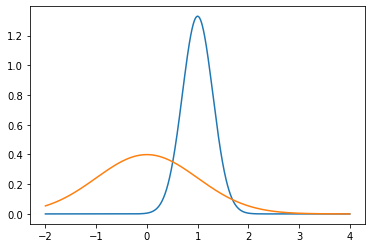

In [234]:
xx = np.linspace(-2, 4, 1000)
plt.plot(xx, likelihood(xx))
plt.plot(xx, model.likelihood(xx))

In [235]:
print(model.likelihood(xx).sum()*6/1000)
print(likelihood(xx).sum()*6/1000)

0.9764030271259628
0.999


0.01


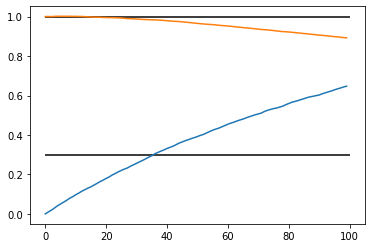

0.05


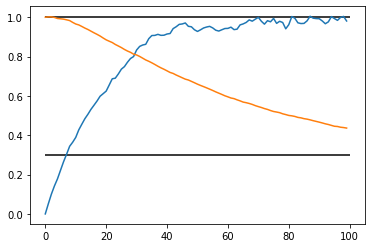

0.1


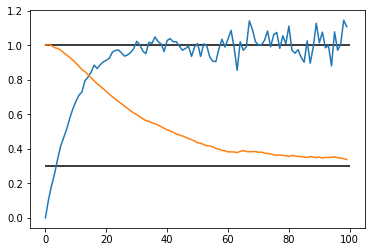

In [263]:
mu = torch.tensor([1.])
sigma = torch.tensor([.3])
n = 10

for lr in [.01,.05,.1]:
    print(lr)
    model = Gauss1D()
    opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)
    curves = []
    mus = []
    sigmas = []
    for t in range(100):
        mus += [float(model.mu)]
        sigmas += [float(torch.exp(-model.z/2))] # [float(model.z)]
        curves+=[model.likelihood(xx)]
            
        x = mu + sigma * torch.randn(n)
        
        opt.zero_grad()
        loss = model(x).mean()
        loss.backward()
        opt.step()

    plt.figure()
    plt.plot(mus)
    plt.plot(sigmas)
    plt.hlines([1, .3],0, len(mus))
    plt.show()


In [207]:
print(model.mu)
print(torch.exp(model.z))

Parameter containing:
tensor(1.0584, requires_grad=True)
tensor(5.9446, grad_fn=<ExpBackward>)
